# Random dataset generation

This example shows generation of two-dimensional dataset follows bivariate Gaussian distribution.

[Gsl_randist.bivariate_gaussian](http://mmottl.github.io/gsl-ocaml/api/Gsl_randist.html#VALbivariate_gaussian)
is a binding to [gsl_ran_bivariate_gaussian](https://www.gnu.org/software/gsl/manual/html_node/The-Bivariate-Gaussian-Distribution.html),
a function generates a two random numbers following bivariate Gaussian distribution defined as

$$
\newcommand{d}{\mathrm{d}}
p(x,y) \d x \d y =
\frac{1}{2 \pi \sigma_x \sigma_y \sqrt{1-\rho^2}}
\exp\left(
  -\frac{x^2 / \sigma_x^2 + y^2 / \sigma_y^2 - 2 \rho x y / (\sigma_x \sigma_y)}{2(1-\rho^2)}
\right) \d x \d y
$$

where $\sigma_x$ and $\sigma_y$ are standard deviations of $x$ and $y$ respectively,
and $\rho \in [-1,+1]$ is a correlation coefficient between $x$ and $y$.

In [1]:
#thread ;;
#require "gsl" ;;
#require "jupyter.archimedes" ;;

Module Archimedes loaded and aliased as A.


In [2]:
let rng = Gsl.Rng.(make MT19937) ;; (* Mersenne Twister *)

(* Generate positive examples *)
let positive_xys =
    Array.init 100 (fun _ -> Gsl.Randist.bivariate_gaussian rng ~sigma_x:0.4 ~sigma_y:0.9 ~rho:0.4)
    |> Array.map (fun (x, y) -> (x +. 0.5, y -. 0.1))

(* Generate negative examples *)
let negative_xys =
    Array.init 100 (fun _ -> Gsl.Randist.bivariate_gaussian rng ~sigma_x:0.6 ~sigma_y:1.2 ~rho:0.3)
    |> Array.map (fun (x, y) -> (x -. 0.8, y +. 0.4))

val rng : Gsl.Rng.t = <abstr>


val positive_xys : (float * float) array =
  [|(0.473961135502044439, -0.012970389488107234);
    (-0.129328309963855026, -0.739066782463754901);
    (0.611770960689301702, 1.38175245248746337);
    (0.980861134355586861, 0.937928884197932);
    (0.258338774923684233, 0.505326681173164594);
    (0.530330810877653769, -1.12646726780869266);
    (0.282150823513374727, -2.27302751526679669);
    (0.236318926335476742, -0.897626465429733567);
    (0.455881933556723351, -0.171951266431705496);
    (0.571727361648575516, 0.701616091983125467);
    (1.34100419921166791, 0.64234675547029263);
    (0.598966555643246, -1.08041273183328324);
    (0.357898429129681839, -0.778884235460391761);
    (0.285528739028345968, -0.14313917328830944);
    (1.04643816525960576, 1.07729791628968341);
    (0.617138063373849466, -0.446805964531099109);
    (0.629671383070630641, -0.509584733471038165);
    (0.062533109659662578, -0.487873129355432811);
    (0.129077658202316037, -0.986368054243515813);
    (0.5

val negative_xys : (float * float) array =
  [|(-0.740868370664090836, 1.08918425571426525);
    (-1.37740650541737208, -0.485504714798280612);
    (-0.727393570168965886, 0.973982719532094143);
    (-0.784392023838062502, 2.71865137646865263);
    (-0.00955136985225313317, 3.33509446978725954);
    (0.342220316945413217, 0.660543080466411303);
    (-0.722361712483384766, -0.405427078724945);
    (0.146598097170695274, -0.498120376495847172);
    (-0.811723235783548325, -1.19667575390282099);
    (0.187228179687351837, 0.554514773594020793);
    (-1.08040064453677243, 1.92746757785456646);
    (-0.960946588169249383, -1.22096520776165463);
    (-0.667954961891730647, -0.720769814236824069);
    (-2.00113756159833311, -0.485262655724939429);
    (-1.21146979136696231, 0.360150961615395726);
    (-0.634255919303336468, 3.17229196538087832);
    (-1.33674506013146921, 0.4805521728609084);
    (-1.33312617691822299, 0.505288952406999781);
    (-1.6594723790983108, -0.941153163348022681);
 

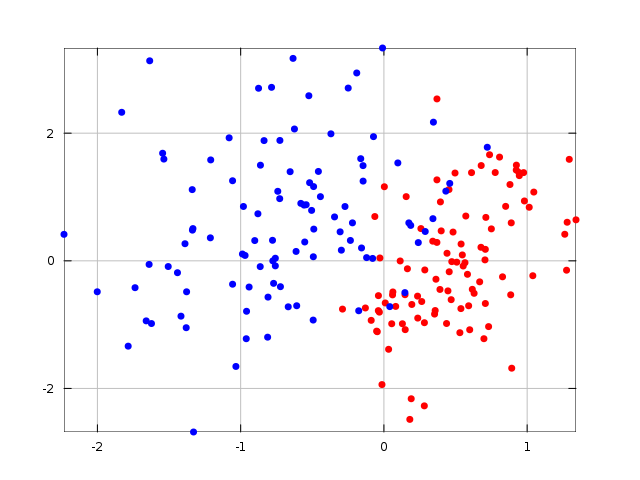

- : unit = ()


In [3]:
let vp = A.init ["jupyter"] in
A.Axes.box vp ;

A.set_color vp A.Color.red ;
A.Array.xy_pairs vp positive_xys ;

A.set_color vp A.Color.blue ;
A.Array.xy_pairs vp negative_xys ;

A.close vp

In [4]:
let oc = open_out "datasets/bivariate_gaussian_2d.csv" in
let ppf = Format.formatter_of_out_channel oc in
Array.iter
  (fun (x, y) -> Format.fprintf ppf "%g,%g,0@." x y)
  negative_xys ;
Array.iter
  (fun (x, y) -> Format.fprintf ppf "%g,%g,1@." x y)
  positive_xys ;
close_out

- : out_channel -> unit = <fun>
